In [ ]:
# reference 
# 코드 : https://bkshin.tistory.com/entry/OpenCV-12-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9C%A0%EC%82%AC%EB%8F%84-%EB%B9%84%EA%B5%90-%EC%82%AC%EB%9E%8C-%EC%96%BC%EA%B5%B4%EA%B3%BC-%ED%95%B4%EA%B3%A8-%ED%95%A9%EC%84%B1-%EB%AA%A8%EC%85%98-%EA%B0%90%EC%A7%80-CCTV
# 히스토그램 유사도 비교 방법 : https://wjddyd66.github.io/opencv/OpenCV(4)/
# 변수 자동 생성 예제 : https://muzukphysics.tistory.com/225

In [ ]:
# 0. 원본

# 히스토그램 비교 (histo_compare.py)

import cv2, numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('../img/taekwonv1.jpg')
img2 = cv2.imread('../img/taekwonv2.jpg')
img3 = cv2.imread('../img/taekwonv3.jpg')
img4 = cv2.imread('../img/dr_ochanomizu.jpg')

cv2.imshow('query', img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()

CORREL    	img1:   1.00	img2:   0.20	img3:   0.16	img4:   0.85	
CHISQR    	img1:   0.00	img2: 663.39	img3: 122.86	img4:  44.16	
INTERSECT 	img1:   1.00	img2:   0.26	img3:   0.15	img4:   0.33	
BHATTACHARYYA	img1:   0.00	img2:   0.75	img3:   0.79	img4:   0.40	


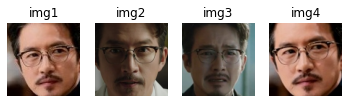

In [10]:
# 1. 4개 사진 비교 (경로 수정)

# 히스토그램 비교 (histo_compare.py)

import cv2, numpy as np
import matplotlib.pylab as plt
import os

path_dir = 'C:/Users/Administrator/Desktop/datacampus/data/croped_junho'
file_list = os.listdir(path_dir)

img1 = cv2.imread(path_dir+'/'+file_list[8])
img2 = cv2.imread(path_dir+'/'+file_list[1])
img3 = cv2.imread(path_dir+'/'+file_list[2])
img4 = cv2.imread(path_dir+'/'+file_list[3])

cv2.imshow('query', img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()

CORREL    	img1:   1.00	img2:   0.38	img3:   0.15	img4:   0.02	img5:   0.02	img6:   1.00	img7:   0.38	img8:   0.15	img9:   0.02	img10:   0.02	


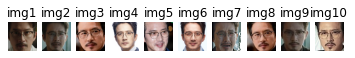

In [21]:
# 2. n개 사진 비교

# 히스토그램 비교 (histo_compare.py)

import cv2, numpy as np
import matplotlib.pylab as plt
import os

path_dir = 'C:/Users/Administrator/Desktop/datacampus/data/croped_junho'
file_list = os.listdir(path_dir)
file_len = len(file_list)

a = 11
imgs = []
for _ in range(1, a):
    img_data = cv2.imread(path_dir+'/'+file_list[_])
    globals()['img{}'.format(_)] = img_data
    imgs.append(img_data)

hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off')
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)

query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()

몇번째 사진을 검수하시겠습니까? : 3
상관관계 기준 : 0.8
CORREL    	croped_google_0007.jpg.jpg:   1.00
croped_google_0018.jpg.jpg:   0.85
croped_naver_0072.jpg.jpg:   0.87
croped_naver_0162.jpg.jpg:   0.91
croped_naver_0380.jpg.jpg:   0.85
croped_naver_0383.jpg.jpg:   0.91
croped_naver_0426.jpg.jpg:   0.81
croped_naver_0445.jpg.jpg:   0.86
croped_naver_0453.jpg.jpg:   0.92
croped_naver_0498.jpg.jpg:   0.89
croped_naver_0513.jpg.jpg:   0.85
croped_naver_0520.jpg.jpg:   0.90
croped_naver_0527.jpg.jpg:   0.91
croped_naver_0549.jpg.jpg:   0.85



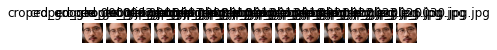

In [8]:
# https://bkshin.tistory.com/entry/OpenCV-12-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9C%A0%EC%82%AC%EB%8F%84-%EB%B9%84%EA%B5%90-%EC%82%AC%EB%9E%8C-%EC%96%BC%EA%B5%B4%EA%B3%BC-%ED%95%B4%EA%B3%A8-%ED%95%A9%EC%84%B1-%EB%AA%A8%EC%85%98-%EA%B0%90%EC%A7%80-CCTV

x = int(input('몇번째 사진을 검수하시겠습니까? : '))
cor = float(input('상관관계 기준 : '))

# 히스토그램 비교 (histo_compare.py)

import cv2, numpy as np
import matplotlib.pylab as plt
import os

path_dir = 'C:/Users/Administrator/Desktop/datacampus/data/croped_junho'
file_list = os.listdir(path_dir)
file_len = len(file_list)

a = file_len
imgs = []
for _ in range(0, a):
    img_data = cv2.imread(path_dir+'/'+file_list[_])
    globals()['img{}'.format(_)] = img_data
    imgs.append(img_data)

hists = []
for i, img in enumerate(imgs) :
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)

query = hists[x]
delete_num = []
methods = {'CORREL' :cv2.HISTCMP_CORREL}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')   # 표 만들기
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        if ret >= cor:
            print("%s:%7.2f"% (file_list[i] , ret), end='\n')
            delete_num.append(i)
    print()
plt.show()

delete_img = [imgs[_] for _ in delete_num]
for i, img in enumerate(delete_img) :
    plt.subplot(1,len(delete_img),i+1)
    plt.title(file_list[i])
    plt.axis('off')
    plt.imshow(img[:,:,::-1])